# Making figure 7 of paper
23/03/2025

In [1]:
import bagpipes as pipes
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.lines import Line2D

plt.rcParams.update({'font.size': 16})
import seaborn as sns
import os
from bagpipes import plotting
pipes.plotting.update_rcParams()
matplotlib.rcParams["axes.linewidth"] = 1.0

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.


In [2]:
# change working directory to one layer above
os.chdir('..')
# set saving direction
save_dir = 'plots/'

In [20]:
# load in percentiles tables
RPSB_percentiles = pd.read_csv('data/posterior_percentiles_RPSB_PSB.csv')
central_percentiles = pd.read_csv('data/Table4.csv')

# convert halftime to in Gyr units
for p in [16,50,84]:
    RPSB_percentiles[f'halftime_{p}'] = RPSB_percentiles[f'halftime_{p}']/1000
    central_percentiles[f'halftime_{p}'] = central_percentiles[f'halftime_{p}']/1000

# set any quenching timescales in centralspx above 10Gyr to 10Gyr
central_percentiles.loc[central_percentiles['halftime_16']>10, 'halftime_16'] = 10
central_percentiles.loc[central_percentiles['halftime_50']>10, 'halftime_50'] = 10
central_percentiles.loc[central_percentiles['halftime_84']>10, 'halftime_84'] = 10

# rename some columns from the central table
rename_dict = {col:'centralspx_'+col for col in ['ssfr_16', 'ssfr_50', 'ssfr_84', 'halftime_16', 'halftime_50', 'halftime_84', 'time_since_peak_16', 'time_since_peak_50', 'time_since_peak_84']}
central_percentiles.rename(columns=rename_dict, inplace=True)

# join the two tables together
percentiles = pd.merge(RPSB_percentiles, central_percentiles, on='plateifu', how='left')

# make a filter for galaxies with poorly fit centres
mask_bad_central_fit = np.isnan(percentiles['centralspx_ssfr_16'])

In [21]:
RPSB_type = {
    '0': ['8250-12704', '8322-1901', '9891-6102', '11749-12704', '11827-1902'],
    '1': ['8445-6104', '8458-6102', '8997-3704', '12510-3704', '8610-3701'],
    '2': ['7990-12705', '8080-3704', '8083-12703', '8146-1901', '8253-12703', '8323-6103', '8324-12701', '8440-6104', 
          '8453-3704', '8713-3703', '8936-6104', '9867-9102', '10840-3703', '11020-6103', '11745-12702', '11747-3701', 
          '11751-3702', '12071-1901'],
    '3': ['8334-3701', '8440-1901', '8554-3701', '8651-1902', '8932-12704', '8981-1902', '9188-12705', 
          '9505-6102', '10518-3701', '11022-6101', '11830-12701'],
    '4': ['8152-3703', '10498-6101']
}
RPSB_type_list = []
for pi in percentiles['plateifu']:
    for type in RPSB_type:
        if pi in RPSB_type[type]:
            RPSB_type_list.append(int(type))
            break
percentiles['RPSB_type'] = RPSB_type_list

<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:97: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\m'
<>:135: SyntaxWarning: invalid escape sequence '\m'
<>:136: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:97: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\m'
<>:135: SyntaxWarning: invalid escape sequence '\m'
<>:136: SyntaxWarning: invalid escape sequence '\m'
/var/folders/9n/82gv6ltj69qcrbh6pcg8c_q80000gn/T/ipykernel_61212/4031487553.py:50: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel('$\\mathrm{PSB\\ Burst\\ Age}\\ /\\ \mathrm{Gyr}$')
/var/folders/9n/82gv6ltj69qcrbh6pcg8c_q80000gn/T/ipykernel_61212/4031487553.py:51: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_ylabel('$\\mathrm{PSB\\ Half\\ time}\\ \\tau_{1

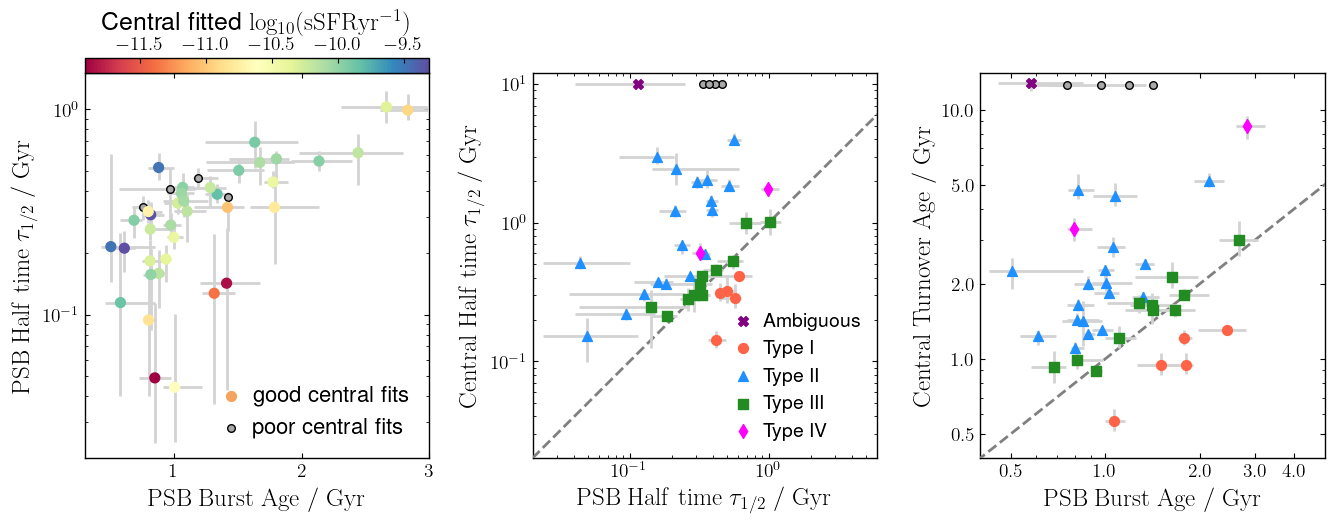

In [23]:
from matplotlib.legend_handler import HandlerTuple

# specify colormap
cmap = 'Spectral'

# specify colour, markers and labels used for the four RPSB types
markers = ['X', 'o', '^', 's', 'd']
labels = ['Ambiguous', 'Type I', 'Type II', 'Type III', 'Type IV']
colors = ['purple', 'tomato', 'dodgerblue', 'forestgreen', 'magenta']

fig,ax = plt.subplots(1,3, figsize=[16, 5])
plt.subplots_adjust(wspace=0.3)

###### tburst vs halftime vs central sSFR
xparam = 'burstage'
yparam = 'halftime'
RPSB_c = 'centralspx_ssfr_50'
xlims = [0.3,3.0]
ylims = [0.02,1.5]

ax[0].set_yscale('log')

ax[0].set_xlim([0.3,3.0])
ax[0].set_ylim([0.02,1.5])
        
vmin = percentiles[~mask_bad_central_fit][RPSB_c].min()
vmax = percentiles[~mask_bad_central_fit][RPSB_c].max()
        
# good central fits
s2 = ax[0].scatter(percentiles[xparam+'_50'][~mask_bad_central_fit], 
                        percentiles[yparam+'_50'][~mask_bad_central_fit], 
                        c=percentiles[RPSB_c][~mask_bad_central_fit], 
                        vmin=vmin, vmax=vmax, cmap=cmap, s=50, zorder=11)

# bad central fits
ax[0].scatter(percentiles[xparam+'_50'][mask_bad_central_fit], 
                    percentiles[yparam+'_50'][mask_bad_central_fit], 
                            color='darkgray', edgecolor='k', s=30, zorder=9)
    
# errorbars
ax[0].errorbar(percentiles[xparam+'_50'], 
             percentiles[yparam+'_50'], 
             xerr=[percentiles[xparam+'_50']-percentiles[xparam+'_16'], 
                   percentiles[xparam+'_84']-percentiles[xparam+'_50']],
             yerr=[percentiles[yparam+'_50']-percentiles[yparam+'_16'], 
                   percentiles[yparam+'_84']-percentiles[yparam+'_50']],
             color='lightgray', fmt='none', zorder=8
            )
    
ax[0].set_xlabel('$\\mathrm{PSB\\ Burst\\ Age}\\ /\\ \mathrm{Gyr}$')
ax[0].set_ylabel('$\\mathrm{PSB\\ Half\\ time}\\ \\tau_{1/2}\\ /\\ \mathrm{Gyr}$')
    
    
# add RPSB_c colorbar
cax2 = fig.add_axes([0.125, 0.88, 0.215, 0.03])
fig.colorbar(s2, cax=cax2, orientation='horizontal', label="Central fitted $\\mathrm{log_{10}(sSFR\\mathrm{yr}^{-1})}$")
cax2.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
cax2.xaxis.set_label_position('top')
cax2.set_xticks([-11.5, -11, -10.5, -10, -9.5])
    
# legend
ss1 = ax[0].scatter([],[], facecolor='sandybrown', edgecolor='sandybrown', marker='o', s=50)
ss4 = ax[0].scatter([],[], facecolor='darkgray', edgecolor='k', marker='o', s=30)
ax[0].legend([(ss1), (ss4)], ['good central fits', 'poor central fits'],
                       handler_map={tuple: HandlerTuple(ndivide=None)}, handletextpad=0.0, loc='lower right',
                     fontsize=16, frameon=False)

##### halftime vs halftime
xparam = 'halftime'
yparam = 'centralspx_halftime'

# bad central fits
ax[1].scatter(percentiles[mask_bad_central_fit][xparam+'_50'], 
            np.sum(mask_bad_central_fit) * [10], 
            color='darkgray', edgecolor='k', s=30, zorder=9)

# good central fits, split by types
for typei in range(5):
    mask = (percentiles['RPSB_type'] == typei) & (~mask_bad_central_fit)
    ax[1].scatter(percentiles[mask][xparam+'_50'], percentiles[mask][yparam+'_50'], marker=markers[typei],
               s=50, zorder=10, label=labels[typei], c=colors[typei])
# errorbars
ax[1].errorbar(percentiles[xparam+'_50'], 
             percentiles[yparam+'_50'], 
             xerr=[percentiles[xparam+'_50']-percentiles[xparam+'_16'], 
                   percentiles[xparam+'_84']-percentiles[xparam+'_50']],
             yerr=[percentiles[yparam+'_50']-percentiles[yparam+'_16'], 
                   percentiles[yparam+'_84']-percentiles[yparam+'_50']],
             color='lightgray', fmt='none', zorder=8
            )

ax[1].plot([0.01, 15], [0.01, 15], color='gray', ls='--', zorder=3)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim([0.02, 6])
ax[1].set_ylim([0.02, 12])
ax[1].set_xlabel('$\\mathrm{PSB\\ Half\\ time}\\ \\tau_{1/2}\\ /\\ \mathrm{Gyr}$')
ax[1].set_ylabel('$\\mathrm{Central\\ Half\\ time}\\ \\tau_{1/2}\\ /\\ \mathrm{Gyr}$')
ax[1].legend(frameon=False, loc='lower right', handletextpad=0, fontsize=14)

##### tburst vs turnover time
xparam = 'burstage'
yparam = 'centralspx_time_since_peak'

# bad central fits
ax[2].scatter(percentiles[mask_bad_central_fit][xparam+'_50'], 
            np.sum(mask_bad_central_fit) * [12.5], 
            color='darkgray', edgecolor='k', s=30, zorder=9)
ax[2].errorbar(percentiles[mask_bad_central_fit][xparam+'_50'], 
               np.sum(mask_bad_central_fit) * [12.5],
               xerr=[percentiles[mask_bad_central_fit][xparam+'_50']-percentiles[mask_bad_central_fit][xparam+'_16'], 
                     percentiles[mask_bad_central_fit][xparam+'_84']-percentiles[mask_bad_central_fit][xparam+'_50']],
               color='lightgray', fmt='none', zorder=8)

# good central fits, split by types
for typei in range(5):
    mask = (percentiles['RPSB_type'] == typei) & (~mask_bad_central_fit)
    ax[2].scatter(percentiles[mask][xparam+'_50'], percentiles[mask][yparam+'_50'], marker=markers[typei],
               s=50, zorder=10, label=labels[typei], color=colors[typei])
# errorbars
ax[2].errorbar(percentiles[~mask_bad_central_fit][xparam+'_50'], 
             percentiles[~mask_bad_central_fit][yparam+'_50'], 
             xerr=[percentiles[~mask_bad_central_fit][xparam+'_50']-percentiles[~mask_bad_central_fit][xparam+'_16'], 
                   percentiles[~mask_bad_central_fit][xparam+'_84']-percentiles[~mask_bad_central_fit][xparam+'_50']],
             yerr=[percentiles[~mask_bad_central_fit][yparam+'_50']-percentiles[~mask_bad_central_fit][yparam+'_16'], 
                   percentiles[~mask_bad_central_fit][yparam+'_84']-percentiles[~mask_bad_central_fit][yparam+'_50']],
             color='lightgray', fmt='none', zorder=8
            )

ax[2].plot([0, 14], [0, 14], color='gray', ls='--', zorder=3)
ax[2].set_xlim([0.4, 5])
ax[2].set_ylim([0.4, 14])
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel('$\\mathrm{PSB\\ Burst\\ Age}\\ /\\ \mathrm{Gyr}$')
ax[2].set_ylabel('$\\mathrm{Central\\ Turnover\\ Age}\\ /\\ \mathrm{Gyr}$')
#ax[2].legend(frameon=False, loc='lower right', handletextpad=0, fontsize=14)
ax[2].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[2].set_xticks([0.5, 1, 2, 3, 4])
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[2].set_yticks([0.5, 1, 2, 5, 10])

#save_name = save_dir+'RPSBvsCentral_sfh_scatter.pdf'
#plt.savefig(save_name, bbox_inches='tight', dpi=300)

plt.show()